In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/content/train_data.txt', delimiter=':::', header=None, names=['ID','TITLE','GENRE','DESCRIPTION'])

In [ ]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
genre_counts = train_data['GENRE'].value_counts()

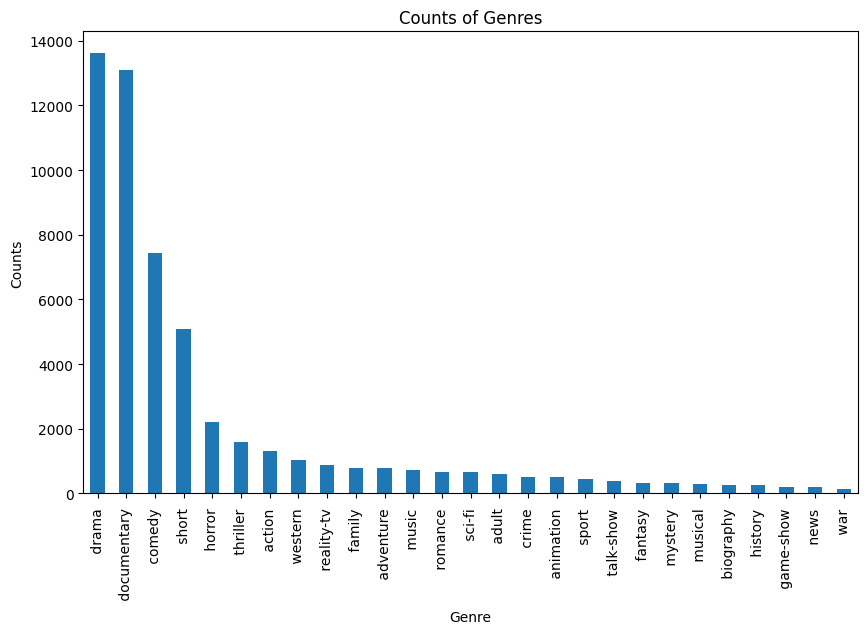

In [ ]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Counts of Genres')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [ ]:
train_data.shape

(54214, 4)

In [ ]:
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
train_data['TITLE'].value_counts()

TITLE
 Oscar et la dame rose (2009)                   1
 Zauber der Boheme (1937)                       1
 To Love and to Cherish (2012)                  1
 Adult Prom (????)                              1
 Arai Enn 305-il Kadavul (2008)                 1
                                               ..
 Jureks Kino (2006)                             1
 Werk it, Bro (2016)                            1
 Vers le sud (2005)                             1
 Les beaux souvenirs (1981)                     1
 Nature's Fury: Storm of the Century (2006)     1
Name: count, Length: 54214, dtype: int64

In [ ]:
test_data = pd.read_csv('test_data.txt', delimiter=':::', header=None, names=['ID','TITLE','DESCRIPTION'])

In [ ]:
test_data.shape

(54200, 3)

In [ ]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [ ]:
test_data['TITLE'].value_counts()

TITLE
 Edgar's Lunch (1998)                                                      1
 Relationship with Grannie (????)                                          1
 The Dummy (1995)                                                          1
 Moonlighting (1982)                                                       1
 Beggar on Horseback (1925)                                                1
                                                                          ..
 An Everlasting Piece (2000)                                               1
 The Last Steamship: The Search for the SS City of Medicine Hat (2010)     1
 "Ombre Ma Fi" (2017)                                                      1
 Tapioca (2009)                                                            1
 Curitiba Zero Grau (2010)                                                 1
Name: count, Length: 54200, dtype: int64

In [ ]:
test_solution = pd.read_csv('/content/test_data_solution.txt', delimiter=':::', header=None, names=['ID','TITLE','GENRE','DESCRIPTION'])

In [ ]:
test_solution.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
test_solution.shape

(54200, 4)

In [ ]:
train_data['TEXT'] = train_data['TITLE'] + ' ' + train_data['DESCRIPTION']
test_data['TEXT'] = test_data['TITLE'] + ' ' + test_data['DESCRIPTION']

In [ ]:
test_solution['TEXT'] = test_solution['TITLE'] + ' ' + test_solution['DESCRIPTION']

In [ ]:
train_data.drop(columns=['ID','TITLE','DESCRIPTION'], inplace=True)
test_data.drop(columns=['ID','TITLE','DESCRIPTION'], inplace=True)

In [ ]:
test_solution.drop(columns=['ID','TITLE','DESCRIPTION'], inplace=True)

In [ ]:
test_solution.head()

,GENRE,TEXT
0,thriller,Edgar's Lunch (1998) L.R. Brane loves his l...
1,comedy,"La guerra de papá (1977) Spain, March 1964:..."
2,documentary,Off the Beaten Track (2010) One year in the...
3,drama,"Meu Amigo Hindu (2015) His father has died,..."
4,drama,Er nu zhai (1955) Before he was known inter...


In [ ]:
test_data.head()

,TEXT
0,Edgar's Lunch (1998) L.R. Brane loves his l...
1,"La guerra de papá (1977) Spain, March 1964:..."
2,Off the Beaten Track (2010) One year in the...
3,"Meu Amigo Hindu (2015) His father has died,..."
4,Er nu zhai (1955) Before he was known inter...


In [ ]:
X_train = train_data['TEXT']
y_train = train_data[['GENRE']]

X_test = test_data['TEXT']
y_test = test_solution['GENRE']

In [ ]:
vectorizer = TfidfVectorizer()

x_train_vectorized = vectorizer.fit_transform(X_train)
x_test_vectorized = vectorizer.transform(X_test)

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train_vectorized, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(x_test_vectorized)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))